Système à deux niveaux

In [2]:
# Tout d'abord, les bibliothèques de fonctions sont chargées
import matplotlib.pyplot as plt # importer le module Matplotlib comme "plt"
import numpy as np # importer le module NumPy comme "np"
import sys
from matplotlib import rc # Permet l'utilisation de LateX dans les
#legendes des figures

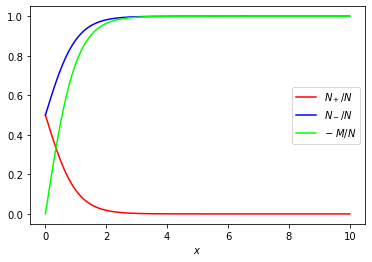

In [3]:
# En premier lieu, traçons les populations N+ et N-
# x = beta x E
# La commande suivante génère une série de x qui serviront à définir l'axe des abscisses>
x = np.linspace(0, 10, 250)
# Puisque l'ordinateur travaille avec des variables adimensionnées, il est préférable
# de travailler avec N+/N et N-/N.

fig, ax = plt.subplots()
plt.plot(x, 1/(1 + np.exp(2*x)),'r', label = r'$N_+/N$')
plt.plot(x, np.exp(2*x)/(1 + np.exp(2*x)),'b', label = r'$N_-/N$')
# Attention, pour garder des valeurs positives, nous traçons -M, et non pas M.
plt.plot(x, (np.exp(2*x)-1)/(1 + np.exp(2*x)),color = 'lime', label = r'$-\;M/N$')
ax.legend()
plt.xlabel(r'$x$')
plt.show()

In [4]:
# Nous observons que, conformément à ce qui peut être attendu, à l'équilibre, la population dans le niveau
# fondamental (N-) est plus importante que celle dans le niveau excité (N+).
# De plus, plus x augmente, c'est à dire, plus la température diminue, plus le niveau excité
# devient inaccessible, ce qui correpond bien à ce qui est attendu physiquement.
# Afin de se conformer à ce qui est demandé dans l'énoncé, nous la traçons en fonction de T, qui est
# proportionnelle à 1/x.

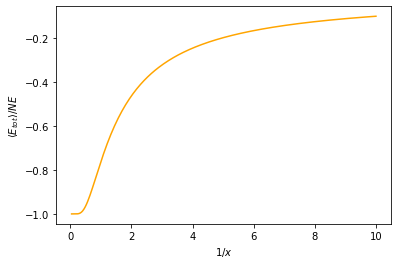

In [5]:
# Nous pouvons à partir de ces résultats tracer l'évolution de l'énergie moyenne (adimensionnée)
# en fonction de x.

# Nous devons enlever 0 pour éviter de faire diverger la première valeur.
x = np.delete(x, 0)

fig, ax = plt.subplots()
plt.plot(x, (1-np.exp(2/x))/(1 + np.exp(2/x)),color = 'orange')
plt.xlabel(r'$1/x$')
plt.ylabel(r'$\left<E_{tot}\right>/NE$')
plt.show()

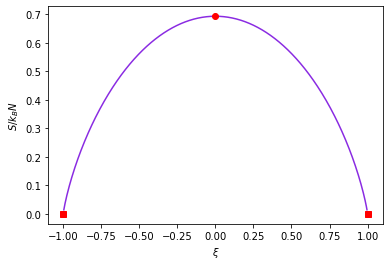

In [7]:
# Nous traçons ici l'entropie, ou plus précisément S/k_BN
# xi est égal à M/N
# Comme l'expression de cette fonction est plus compliquée, il est préférable de la définir en tant que fonction.

def entropie(xi):
    return np.log(2) - (1 + xi)/2*np.log((1 + xi)) - (1 - xi)/2*np.log((1 - xi))

# Nous créons une liste de valeurs régulièrement espacées entre -1 et 1
xi = np.linspace(-1, 1, 500)

# Nous devons enlever -1 et 1 pour éviter de faire diverger la première valeur.
xi = np.delete(xi, 0)
xi = np.delete(xi, -1)

# Nous traçons l'entropie et faisons apparaître les points remarquables
fig, ax = plt.subplots()
plt.plot(xi, entropie(xi),color = 'blueviolet')
plt.plot(1, 0, 'rs')
plt.plot(-1, 0, 'rs')
plt.plot(0, np.log(2), 'ro')
plt.xlabel(r'$\xi$')
plt.ylabel(r'$S/k_BN$')
plt.show()

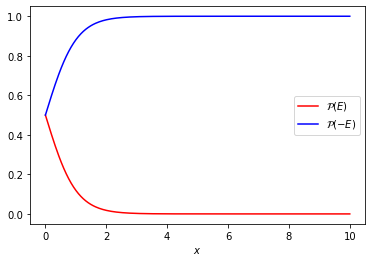

In [32]:
# Reprenons l'exercice en calculant dans l'ensemble canonique, et non pas microcanonique.
# Commençons par tracer les probabilités d'avoir un système dans l'état E ou -E

# x = beta x E
x = np.linspace(0, 10, 250)

fig, ax = plt.subplots()
plt.plot(x, np.exp(-x)/(np.exp(x) + np.exp(-x)),'r', label = r'$\mathcal{P}(E)$')
plt.plot(x, np.exp(x)/(np.exp(x) + np.exp(-x)),'b', label = r'$\mathcal{P}(-E)$')
plt.xlabel(r'$x$')
ax.legend()
plt.show()

In [ ]:
# Il n'est pas difficile de se convaincre qu'effectivement, P(E) + P(-E) = 1 .
# Encore une fois, le niveau excité n'est quasiment pas peuplé à basse température.

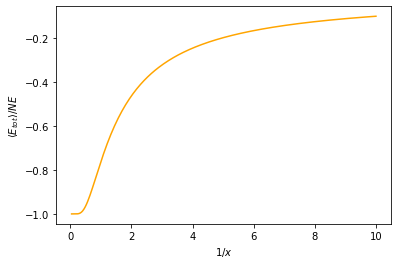

In [34]:
# Nous pouvons à partir de ces résultats tracer l'évolution de l'énergie moyenne (adimensionnée)
# en fonction de x.

# Nous devons enlever 0 pour éviter de faire diverger la première valeur.
x = np.delete(x, 0)

fig, ax = plt.subplots()
plt.plot(x, -np.tanh(1/x) ,color = 'orange')
plt.xlabel(r'$1/x$')
plt.ylabel(r'$\left<E_{tot}\right>/NE$')
plt.show()

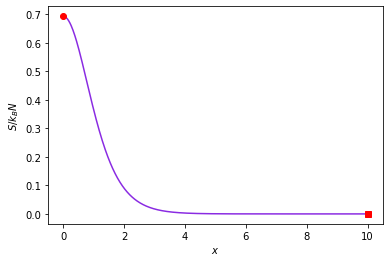

In [18]:
# Nous traçons ici l'entropie, ou plus précisément S/k_BN
# Cette fois-ci, elle est exprimée en fonction de x, et non xi
# Comme l'expression de cette fonction est plus compliquée, il est préférable de la définir en tant que fonction.

def entropie(x):
    return -x*np.tanh(x) + np.log(2*np.cosh(x))

# Nous créons une liste de valeurs régulièrement espacées entre 0 et 10
x = np.linspace(0, 10, 500)

# Nous traçons l'entropie et faisons apparaître les points remarquables
fig, ax = plt.subplots()
plt.plot(x, entropie(x),color = 'blueviolet')
plt.plot(0, np.log(2), 'ro')
plt.plot(10, 0, 'rs')
plt.xlabel(r'$x$')
plt.ylabel(r'$S/k_BN$')
plt.show()

In [ ]:
# L'entropie est maximale pour x = 0, c'est à dire l'état de plus haute énergie. Dans ce cas en effet,
# les deux niveaux sont peuplés, contrairement au cas des basses températures où toutes les particules
# doivent occuper l'état fondamental, il n'y a qu'un seul microétat possible, et l'entropie est nulle.
# Nous retrouvons aussi une entropie maximale égale à ln(2).

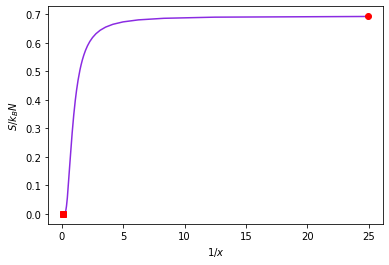

In [41]:
# Nous traçons à présent l'entropie en fonction de la température.

# Nous devons enlever 0 pour éviter de faire diverger la première valeur.
x = np.linspace(0, 10, 250)
x = np.delete(x, 0)

fig, ax = plt.subplots()
plt.plot(1/x, entropie(x), color = 'blueviolet')
plt.plot(24.9, np.log(2), 'ro')
plt.plot(0.1, 0, 'rs')
plt.xlabel(r'$1/x$')
plt.ylabel(r'$S/k_BN$')
plt.show()

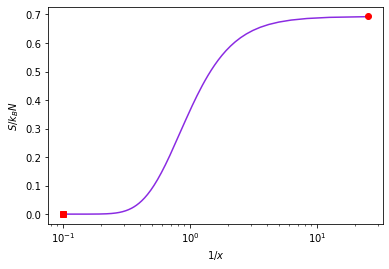

In [40]:
# Étant donné les séparations d'échelle, il est préférable de tracer ce graphique en échelle logarithmique afin
# de mieux apprécier les variations de S.

fig, ax = plt.subplots()
plt.plot(1/x, entropie(x), color = 'blueviolet')
plt.semilogx(24.9, np.log(2), 'ro')
plt.plot(0.1, 0, 'rs')
plt.xlabel(r'$1/x$')
plt.ylabel(r'$S/k_BN$')
plt.show()